### Load libraries

In [ ]:

import numpy as np 
import pandas as pd 
import cv2
import os
from PIL import Image 
import pathlib
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_addons as tfa
from tensorflow.keras.applications.vgg19 import VGG19

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Load data

In [ ]:
# Setting base directory path
base_dir = '/content/drive/My Drive/TRAFFIC SIGN CLASSIFICATION/Traffic-Sign-Classification-main/MAIN/data/multi-class/New folder/'

# Setting directory path for stop and non-stop images
stop_dir = base_dir + 'STOP'
aheadonly_dir = base_dir + 'aheadonly'
p_crossing_dir = base_dir + 'p_crossing'
bike_dir = base_dir + 'bike'
gostraightorleft_dir = base_dir+'gostraightorleft'
noentry_dir = base_dir + 'noentry'
roundabout_dir = base_dir + 'roundabout'
speedlimit20_dir = base_dir + 'speedlimit:20'
speedlimit100_dir = base_dir + 'speedlimit100'
Trucks_dir = base_dir + 'Trucks'



print('Total stop sign images:', len(os.listdir(stop_dir)))
print('Total aheadonly sign images:', len(os.listdir(aheadonly_dir)))
print('Total p_crossing sign images:', len(os.listdir(p_crossing_dir)))
print('Total bike sign images:', len(os.listdir(bike_dir)))
print('Total gostraightorleft sign images:', len(os.listdir(gostraightorleft_dir)))
print('Total noentry:',len(os.listdir(noentry_dir)))
print('Total roundabout:',len(os.listdir(roundabout_dir)))
print('Total speedlimit20:',len(os.listdir(speedlimit20_dir)))
print('Totalspeedlimit100:',len(os.listdir(speedlimit100_dir)))
print('Total Trucks:',len(os.listdir(Trucks_dir)))
                                                
  

Total stop sign images: 168
Total aheadonly sign images: 270
Total p_crossing sign images: 240
Total bike sign images: 160
Total gostraightorleft sign images: 237
Total noentry: 240
Total roundabout: 280
Total speedlimit20: 148
Totalspeedlimit100: 260
Total Trucks: 300


In [ ]:
# Get path of each image in the stop and non-stop folder
stop_images = [stop_dir + '/{}'.format(i) for i in os.listdir(stop_dir)]
aheadonly_images = [aheadonly_dir + '/{}'.format(i) for i in os.listdir(aheadonly_dir)]
p_crossing_images = [p_crossing_dir + '/{}'.format(i) for i in os.listdir(p_crossing_dir)]
bike_images = [bike_dir + '/{}'.format(i) for i in os.listdir(bike_dir)]
gostraightorleft_images = [gostraightorleft_dir + '/{}'.format(i) for i in os.listdir(gostraightorleft_dir)]
noentry_images = [noentry_dir + '/{}'.format(i) for i in os.listdir(noentry_dir)]
roundabout_images = [roundabout_dir + '/{}'.format(i) for i in os.listdir(roundabout_dir)]
speedlimit20_images = [speedlimit20_dir + '/{}'.format(i) for i in os.listdir(speedlimit20_dir)]
speedlimit100_images = [speedlimit100_dir + '/{}'.format(i) for i in os.listdir(speedlimit100_dir)]
trucks_images = [Trucks_dir + '/{}'.format(i) for i in os.listdir(Trucks_dir)]

In [ ]:
# Desired dimension for each image in the dataset
width = 32
height = 32

# 3 for color images and 1 for grayscale
channels = 3

# Function to get x input(array representing picture) and the corresponding label
def read_process_images(image_list, label):
    X = []
    Y = []
    
    for image in image_list:
        #print('abspath:     ', os.path.abspath(image))
        #print('abs dirname: ', os.path.dirname(os.path.abspath(image)))
        image_arr = cv2.imread(image, cv2.IMREAD_UNCHANGED)
        image_arr = cv2.cvtColor(image_arr, cv2.COLOR_BGR2RGB )
        X.append(cv2.resize(image_arr ,  (width, height), interpolation=cv2.INTER_AREA))
        Y.append(label)
    return X, Y
  

In [ ]:
# Since the model can only work with numeric data, we will use 0 for non-stop and 1 for stop sign images
# preprocess stop sign images 
stop_x, stop_y = read_process_images(stop_images, 0)
print('stop')

# preprocess warning sign images
aheadonly_x, aheadonly_y = read_process_images(aheadonly_images, 1)
print('aheadonly')

# preprocess regulatory sign images
p_crossing_x, p_crossing_y = read_process_images(p_crossing_images, 2)
print('p_crossing')

# preprocess regulatory sign images
bike_x, bike_y = read_process_images(bike_images, 3)
print('bike')

# preprocess regulatory sign images
gostraightorleft_x, gostraightorleft_y = read_process_images(gostraightorleft_images, 4)
print('gostraightorleft')

# preprocess stop sign images 
noentry_x, noentry_y = read_process_images(noentry_images, 5)
print('noentry')

# preprocess stop sign images 
roundabout_x, roundabout_y = read_process_images(roundabout_images, 6)
print('roundabout_images')

# preprocess stop sign images 
speedlimit20_x, speedlimit20_y = read_process_images(speedlimit20_images, 7)
print('speedlimit20_images')

# preprocess stop sign images 
speedlimit100_x, speedlimit100_y = read_process_images(speedlimit100_images, 8)
print('speedlimit100_images')

# preprocess stop sign images 
trucks_x, trucks_y = read_process_images(trucks_images, 9)
print('trucks_images')


# Combine stop and non-stop images into X and Y labels
X = stop_x +  aheadonly_x + p_crossing_x +bike_x + gostraightorleft_x + noentry_x + speedlimit20_x + roundabout_x +speedlimit100_x + trucks_x 
Y = stop_y +  aheadonly_y + p_crossing_y +bike_y + gostraightorleft_y + noentry_y + speedlimit20_y + roundabout_y +speedlimit100_y + trucks_y

print('Length of X: ', len(X))
print('Length of Y: ', len(Y))

stop
aheadonly
p_crossing
bike
gostraightorleft
noentry
roundabout_images
speedlimit20_images
speedlimit100_images
trucks_images
Length of X:  2303
Length of Y:  2303


In [ ]:
# Convert list to array
X = np.array(X)
Y = np.array(Y)
print(Y)

[0 0 0 ... 9 9 9]


In [ ]:
X.shape

(2303, 32, 32, 3)

In [ ]:
Y.shape

(2303,)

In [ ]:
from keras.utils import to_categorical

# Shuffle both inputs and labels for splitting in the future.
shuffler = np.random.permutation(len(X))
X = X[shuffler]
Y = Y[shuffler]

Y = to_categorical(Y)

In [ ]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

print('Shape of train images: ', x_train.shape)
print('Shape of train labels: ', y_train.shape)

print()

print('Shape of validation images: ', x_test.shape)
print('Shape of validation labels: ', y_test.shape)

Shape of train images:  (1842, 32, 32, 3)
Shape of train labels:  (1842, 10)

Shape of validation images:  (461, 32, 32, 3)
Shape of validation labels:  (461, 10)


In [ ]:
y_train[0].shape

(10,)

In [ ]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [ ]:
# Length of train and validation data
ntrain = len(x_train)
ntest = len(x_test)
ntest

461

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale= 1./255, # Normalization.
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip = True,)

# Validation dataset doesn't need image augmentation. Only normalization
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
# Defining batch size. It has to be the power of 2
# The batch size tells the data generator to only take the specified batch(16 in our case) of images at a time.
batch_size = 16

# Create image generators using the train and test data
train_generator = train_datagen.flow(x_train, y_train, batch_size=batch_size)
test_generator = test_datagen.flow(x_test, y_test, batch_size=batch_size)

In [ ]:


from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.models import Model
import tensorflow.keras as keras

resnet = ResNet50(include_top=False, weights='imagenet', input_shape=(width,height,3),pooling='max')

output = resnet.layers[-1].output
output = tf.keras.layers.Flatten()(output)
resnet = Model(resnet.input, output)

res_name = []
for layer in resnet.layers:
    res_name.append(layer.name)




94773248/94765736 [==============================] - 1s 0us/step


In [ ]:

res_name[-22:]

['conv5_block2_1_conv',
 'conv5_block2_1_bn',
 'conv5_block2_1_relu',
 'conv5_block2_2_conv',
 'conv5_block2_2_bn',
 'conv5_block2_2_relu',
 'conv5_block2_3_conv',
 'conv5_block2_3_bn',
 'conv5_block2_add',
 'conv5_block2_out',
 'conv5_block3_1_conv',
 'conv5_block3_1_bn',
 'conv5_block3_1_relu',
 'conv5_block3_2_conv',
 'conv5_block3_2_bn',
 'conv5_block3_2_relu',
 'conv5_block3_3_conv',
 'conv5_block3_3_bn',
 'conv5_block3_add',
 'conv5_block3_out',
 'max_pool',
 'flatten']

In [ ]:

set_trainable = False
for layer in resnet.layers:
    if layer.name in res_name[-22:]:
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [ ]:

resnet.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 38, 38, 3)    0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 16, 16, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 16, 16, 64)   256         conv1_conv[0][0]                 
_______________________________________________________________________________________

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D, Dropout

num_classes = 10

model = Sequential()
model.add(resnet)
model.add(Dense(2048, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2048, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
functional_1 (Functional)    (None, 2048)              23587712  
_________________________________________________________________
dense (Dense)                (None, 2048)              4196352   
_________________________________________________________________
dropout (Dropout)            (None, 2048)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 2048)              4196352   
_________________________________________________________________
dropout_1 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                20490     
Total params: 32,000,906
Trainable params: 17,344,522
Non-trainable params: 14,656,384
___________________________________

In [ ]:

adam = tf.keras.optimizers.Adam(learning_rate=0.0001)

early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=8,
                                              restore_best_weights=False
                                              )

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',
                                   factor=0.2,
                                   patience=4,
                                   verbose=1,
                                   min_delta=5*1e-3,min_lr = 5*1e-7,
                                   )

In [ ]:
model.compile(optimizer = adam, 
              loss = 'categorical_crossentropy', 
              metrics=['accuracy',tfa.metrics.F1Score(num_classes=num_classes)])

In [ ]:
# Training model
history = model.fit_generator(train_generator,
                            
                            steps_per_epoch= ntrain// batch_size,
                             epochs=40,
                             validation_data=test_generator,
                              validation_steps= ntest// batch_size)

Epoch 1/40
115/115 [==============================] - 4s 32ms/step - loss: 1.2088 - accuracy: 0.5865 - f1_score: 0.5799 - val_loss: 3.3562 - val_accuracy: 0.2924 - val_f1_score: 0.2678
Epoch 2/40
115/115 [==============================] - 3s 23ms/step - loss: 1.2333 - accuracy: 0.5783 - f1_score: 0.5666 - val_loss: 2.0680 - val_accuracy: 0.3571 - val_f1_score: 0.3087
Epoch 3/40
115/115 [==============================] - 3s 23ms/step - loss: 1.2247 - accuracy: 0.5854 - f1_score: 0.5783 - val_loss: 4.8440 - val_accuracy: 0.2411 - val_f1_score: 0.1809
Epoch 4/40
115/115 [==============================] - 3s 23ms/step - loss: 1.1960 - accuracy: 0.5838 - f1_score: 0.5778 - val_loss: 2.5152 - val_accuracy: 0.2746 - val_f1_score: 0.2149
Epoch 5/40
115/115 [==============================] - 3s 23ms/step - loss: 1.1959 - accuracy: 0.5816 - f1_score: 0.5764 - val_loss: 13.8363 - val_accuracy: 0.1562 - val_f1_score: 0.1232
Epoch 6/40
115/115 [==============================] - 3s 24ms/step - loss:

In [ ]:
def get_diagnostic_plot(model,name):
    training_loss = model.history.history[name]
    test_loss = model.history.history[f'val_{name}']

    # Create count of the number of epochs
    epoch_count = range(1, len(training_loss) + 1)

    # Visualize loss history
    plt.plot(epoch_count, training_loss, 'r')
    plt.plot(epoch_count, test_loss, 'b-')
    plt.legend([f'Training {name}', f'Val {name}'])
    plt.xlabel('Epoch')
    plt.ylabel(name)

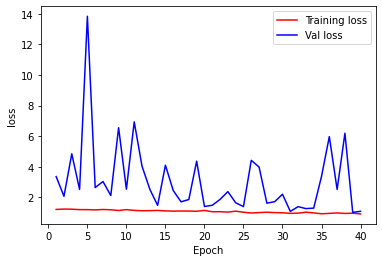

In [ ]:


get_diagnostic_plot(model,'loss')

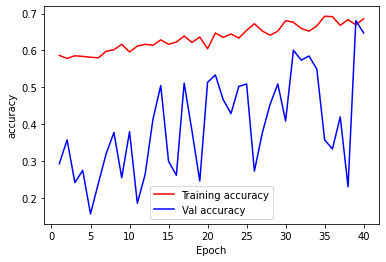

In [ ]:

get_diagnostic_plot(model,'accuracy')

In [ ]:
evaluation = model.evaluate(x_test, y_test)
print('Test Accuracy : {:.3f}'.format(evaluation[1]))

15/15 [==============================] - 0s 16ms/step - loss: 59.4044 - accuracy: 0.1345 - f1_score: 0.0892
Test Accuracy : 0.134


In [ ]:
predicted_classes = model.predict_classes(x_test)


Predicted:  truck


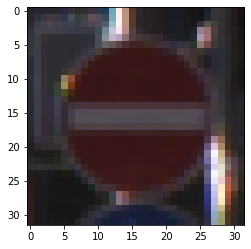

In [ ]:
mapping = ['Stop sign', 'Aheadonly sign', 'p_crossing sign','bike crossing sign', 'gostarightorleft sign','noentry', 'roundabout', 'speedlimit20','speedlimit100', 'truck']
# stop
# aheadonly
# p_crossing
# bike
# gostraightorleft
# noentry
# roundabout_images
# speedlimit20_images
# speedlimit100_images
# trucks_images

plt.imshow(x_test[14])
print()
print('Predicted: ', mapping[predicted_classes[14]])

Predicted:  speedlimit20


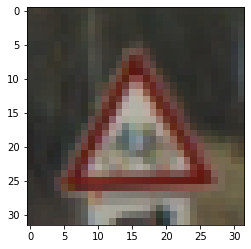

In [ ]:
print('Predicted: ', mapping[predicted_classes[15]])
plt.imshow(x_test[15])

Predicted:  speedlimit20


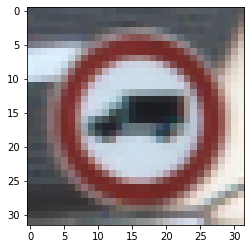

In [ ]:
print('Predicted: ', mapping[predicted_classes[88]])
plt.imshow(x_test[88])

Predicted:  speedlimit20


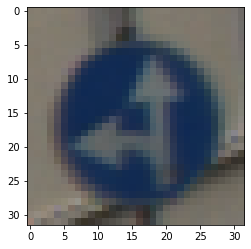

In [ ]:
print('Predicted: ', mapping[predicted_classes[9]])
plt.imshow(x_test[9])

In [ ]:
import numpy as np
rounded_labels=np.argmax(y_test, axis=1)
rounded_labels[1]
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(rounded_labels,predicted_classes ) 
print(classification_report(rounded_labels, predicted_classes, target_names = mapping))

                       precision    recall  f1-score   support

            Stop sign       0.00      0.00      0.00        38
       Aheadonly sign       0.33      0.10      0.16        58
      p_crossing sign       0.00      0.00      0.00        46
   bike crossing sign       0.00      0.00      0.00        27
gostarightorleft sign       0.00      0.00      0.00        49
              noentry       0.14      0.27      0.18        49
           roundabout       0.00      0.00      0.00        51
         speedlimit20       0.10      0.88      0.18        33
        speedlimit100       0.53      0.19      0.28        48
                truck       0.12      0.08      0.10        62

             accuracy                           0.13       461
            macro avg       0.12      0.15      0.09       461
         weighted avg       0.13      0.13      0.09       461



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
